reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

vote - helpful votes of the review

style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

image - images that users post after they have received the product

In [71]:
import pandas as pd
import io
from google.colab import files
from google.colab import drive
import json
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)


In [22]:
pip install pandas openpyxl

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### load the meta data

data = []
with gzip.open('/content/drive/MyDrive/EspecializacionA&DS/Monografia/2doSemestre/AMAZON_FASHION.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

883636
{'overall': 5.0, 'verified': True, 'reviewTime': '10 20, 2014', 'reviewerID': 'A1D4G1SNUZWQOT', 'asin': '7106116521', 'reviewerName': 'Tracy', 'reviewText': 'Exactly what I needed.', 'summary': 'perfect replacements!!', 'unixReviewTime': 1413763200}


In [4]:
# convert list into pandas dataframe

df1 = pd.DataFrame.from_dict(data)

print(len(df1))

883636


In [5]:
df1.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [6]:
### load the meta data

data = []
with gzip.open('/content/drive/MyDrive/EspecializacionA&DS/Monografia/2doSemestre/meta_AMAZON_FASHION.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

186637
{'title': 'Slime Time Fall Fest [With CDROM and Collector Cards and Neutron Balls, Incredi-Ball and Glow Stick Necklace, Paper Fram', 'brand': 'Group Publishing (CO)', 'feature': ['Product Dimensions:\n                    \n8.7 x 3.6 x 11.4 inches', 'Shipping Weight:\n                    \n2.4 pounds'], 'rank': '13,052,976inClothing,Shoesamp;Jewelry(', 'date': '8.70 inches', 'asin': '0764443682', 'imageURL': ['https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL._US40_.jpg'], 'imageURLHighRes': ['https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg']}


In [7]:
# convert list into pandas dataframe

df2 = pd.DataFrame.from_dict(data)

print(len(df2))

186637


In [24]:

# Guardar el DataFrame en formato Excel
df2.to_excel('nombre_del_archivo_salida.xlsx', index=False, engine='openpyxl')

print("Archivo convertido y guardado con éxito.")

Archivo convertido y guardado con éxito.


In [8]:
result = pd.merge(df1,df2, on = "asin")

In [26]:
result.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,title,brand,feature,rank,date,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884806 entries, 0 to 884805
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          884806 non-null  float64
 1   verified         884806 non-null  bool   
 2   reviewTime       884806 non-null  object 
 3   reviewerID       884806 non-null  object 
 4   asin             884806 non-null  object 
 5   reviewerName     884714 non-null  object 
 6   reviewText       883573 non-null  object 
 7   summary          884273 non-null  object 
 8   unixReviewTime   884806 non-null  int64  
 9   vote             80179 non-null   object 
 10  style            304985 non-null  object 
 11  image            28813 non-null   object 
 12  title            884776 non-null  object 
 13  brand            649964 non-null  object 
 14  feature          734441 non-null  object 
 15  rank             851349 non-null  object 
 16  date             867630 non-null  obje

In [11]:
data = result

In [40]:
# Lista de columnas a eliminar
columns_to_drop = ['summary','feature','vote','style', 'reviewText', 'reviewerName', 'image','title','date','imageURL','imageURLHighRes','also_view','also_buy','fit','details','similar_item','tech1','description']

# Eliminar columnas
data = data.drop(columns=columns_to_drop, errors='ignore')

In [34]:
# Suponiendo que df es tu DataFrame
data.dropna(inplace=True)

In [ ]:
# Convertir "nan" (cadena) a np.nan
extracted_series.replace("nan", np.nan, inplace=True)

# Extraer todos los números y comas del principio de la cadena
extracted_series = data['rank'].str.extract(r'([\d,]+)')[0]

# Eliminar comas y convertir a int
data['extracted_rank'] = extracted_series.str.replace(',', '').fillna('0').astype(int)


# Rellenar valores NaN con 0, eliminar comas y convertir a entero
data['extracted_rank'] = extracted_series.fillna(0).astype(str).str.replace(',', '').astype(int)

In [53]:
# Extraer el primer valor cuando hay un rango de precios
data['price'] = data['price'].str.extract(r'(\d+.\d+)')[0]

# Eliminar el símbolo $ y las comas, luego convertir a float
data['price'] = data['price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

In [55]:
# Convertir la columna unixReviewTime a un formato de fecha
data['reviewDate'] = pd.to_datetime(data['unixReviewTime'], unit='s').dt.date

In [65]:
data = data[data['verified'] == True]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203913 entries, 17 to 884727
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         203913 non-null  float64
 1   verified        203913 non-null  bool   
 2   reviewTime      203913 non-null  object 
 3   reviewerID      203913 non-null  object 
 4   asin            203913 non-null  object 
 5   unixReviewTime  203913 non-null  int64  
 6   brand           203913 non-null  object 
 7   rank            203913 non-null  object 
 8   price           203913 non-null  object 
 9   extracted_rank  203913 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 15.8+ MB


In [56]:
data.head(2)

,overall,verified,reviewTime,reviewerID,asin,unixReviewTime,brand,rank,price,extracted_rank,reviewDate
17,3.0,True,"09 22, 2013",A1BB77SEBQT8VX,B00007GDFV,1379808000,Buxton,"43,930inClothing,Shoesamp;Jewelry(",16.95,43930,2013-09-22
18,3.0,True,"09 22, 2013",A1BB77SEBQT8VX,B00007GDFV,1379808000,Buxton,"43,930inClothing,Shoesamp;Jewelry(",16.95,43930,2013-09-22


In [67]:
# Lista de columnas a eliminar
columns_to_drop = ['reviewTime','unixReviewTime','rank','verified']

# Eliminar columnas
data = data.drop(columns=columns_to_drop, errors='ignore')

In [83]:
# Convertir reviewDate a tipo de dato datetime (si aún no lo has hecho)
data['reviewDate'] = pd.to_datetime(data['reviewDate'])

In [84]:
data.head(2)

,overall,reviewerID,asin,brand,price,extracted_rank,reviewDate
17,3.0,A1BB77SEBQT8VX,B00007GDFV,Buxton,16.95,43930,2013-09-22
18,3.0,A1BB77SEBQT8VX,B00007GDFV,Buxton,16.95,43930,2013-09-22


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193975 entries, 17 to 884727
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         193975 non-null  float64       
 1   reviewerID      193975 non-null  object        
 2   asin            193975 non-null  object        
 3   brand           193975 non-null  object        
 4   price           193975 non-null  float64       
 5   extracted_rank  193975 non-null  int64         
 6   reviewDate      193975 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 11.8+ MB


In [59]:
# 1. Entendimiento Básico
print(data.shape)
#print(data.info())
#print(data.head())
#print(data.tail())

(203913, 8)


In [66]:
unique_values_freq = data['verified'].value_counts()
print(unique_values_freq)

True    193975
Name: verified, dtype: int64


In [60]:
# 2. Estadísticas Descriptivas
print(data.describe())
print(data.describe(include=[np.object]))

             overall          price  extracted_rank
count  203913.000000  203913.000000    2.039130e+05
mean        4.120762      21.339689    8.771340e+05
std         1.304139     271.005886    1.964739e+06
min         1.000000       0.010000    0.000000e+00
25%         4.000000       8.990000    5.026500e+04
50%         5.000000      12.950000    2.479620e+05
75%         5.000000      19.990000    8.614450e+05
max         5.000000   69995.000000    2.707478e+07


<ipython-input-60-591006d221b8>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data.describe(include=[np.object]))


            reviewerID        asin    brand  reviewDate
count           203913      203913   203913      203913
unique          191657       13672     4438        3159
top     A3W5A9X3HHACQT  B00RLSCLJM  i play.  2017-07-18
freq                 7        3636     5627         682


In [21]:
# 3. Manejo de Valores Faltantes
missing_values = data.isnull().sum()
print(missing_values)
# Puedes decidir cómo manejar estos valores más adelante.

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
summary              533
unixReviewTime         0
vote              804627
brand             234842
feature           150365
rank               33457
description       686682
price             587034
also_view         577062
also_buy          500930
fit               724485
details           875923
similar_item      881147
tech1             880752
dtype: int64


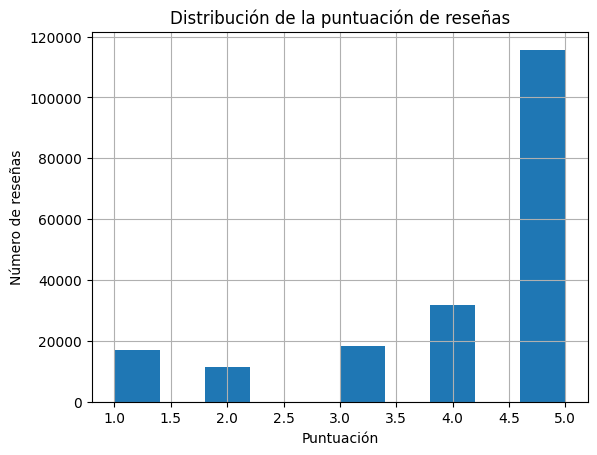

In [72]:
# 4. Visualizaciones

# Histogramas para distribución de variables numéricas
data['overall'].hist()
plt.title('Distribución de la puntuación de reseñas')
plt.xlabel('Puntuación')
plt.ylabel('Número de reseñas')
plt.show()

<ipython-input-73-968a3152df45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


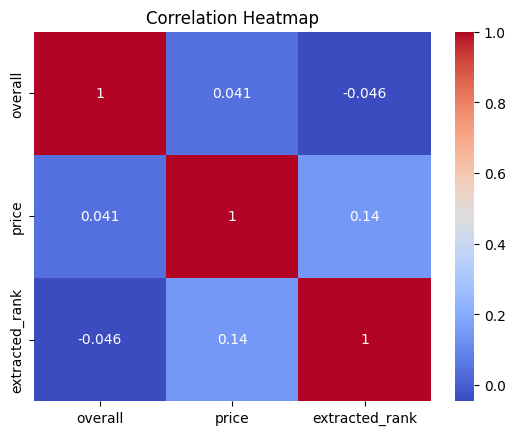

In [73]:
# Matriz de correlación y mapa de calor
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

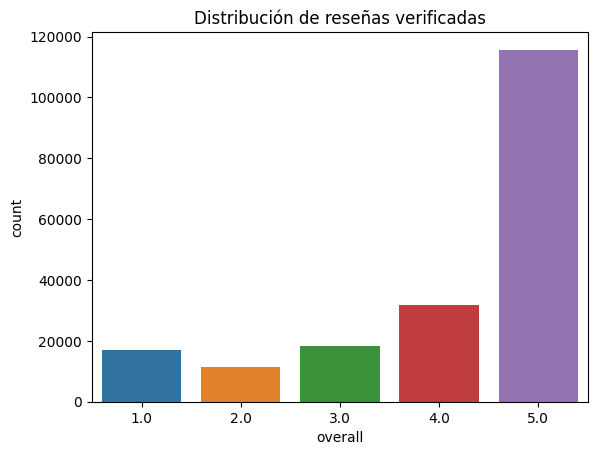

In [75]:
# Diagramas de barras para variables categóricas
sns.countplot(data=data, x='overall')
plt.title('Distribución de reseñas verificadas')
plt.show()

In [ ]:
# 5. Identificación de Valores Atípicos (usando boxplots)
sns.boxplot(data['overall'])
plt.title('Boxplot de la puntuación de reseñas')
plt.show()
# Puedes usar IQR o Z-score para filtrar estos valores más adelante.

In [88]:
# 1. Estadísticas Descriptivas
print(data.describe(include='all'))

              overall      reviewerID        asin    brand          price  \
count   193975.000000          193975      193975   193975  193975.000000   
unique            NaN          182542       13405     4365            NaN   
top               NaN  A2GP4EJIAA2OE0  B00RLSCLJM  i play.            NaN   
freq              NaN               7        3575     5358            NaN   
first             NaN             NaN         NaN      NaN            NaN   
last              NaN             NaN         NaN      NaN            NaN   
mean         4.123232             NaN         NaN      NaN      20.176716   
std          1.301863             NaN         NaN      NaN      32.269836   
min          1.000000             NaN         NaN      NaN       0.010000   
25%          4.000000             NaN         NaN      NaN       8.990000   
50%          5.000000             NaN         NaN      NaN      12.950000   
75%          5.000000             NaN         NaN      NaN      19.990000   

<ipython-input-88-a08030459883>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include='all'))


In [77]:
# 2. Valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
overall           0
reviewerID        0
asin              0
brand             0
price             0
extracted_rank    0
reviewDate        0
dtype: int64


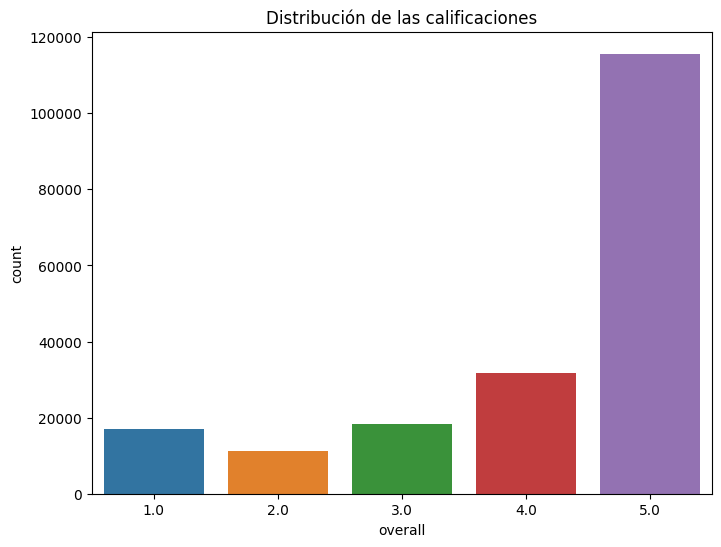

In [78]:
# 3. Distribución de las calificaciones (columna overall)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='overall')
plt.title('Distribución de las calificaciones')
plt.show()

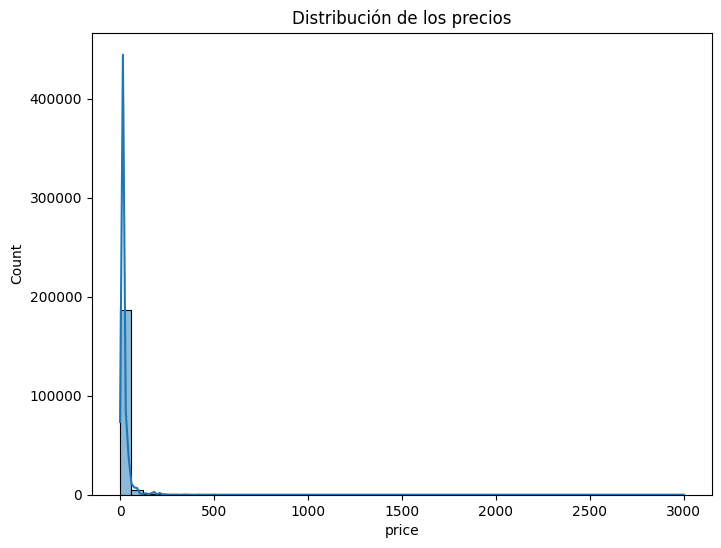

In [79]:
# 4. Distribución de los precios
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', bins=50, kde=True)
plt.title('Distribución de los precios')
plt.show()

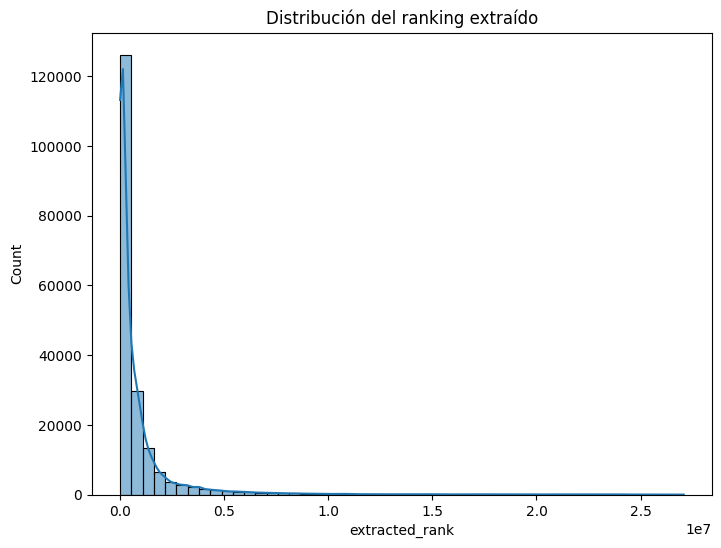

In [80]:
# 5. Distribución del ranking extraído
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='extracted_rank', bins=50, kde=True)
plt.title('Distribución del ranking extraído')
plt.show()

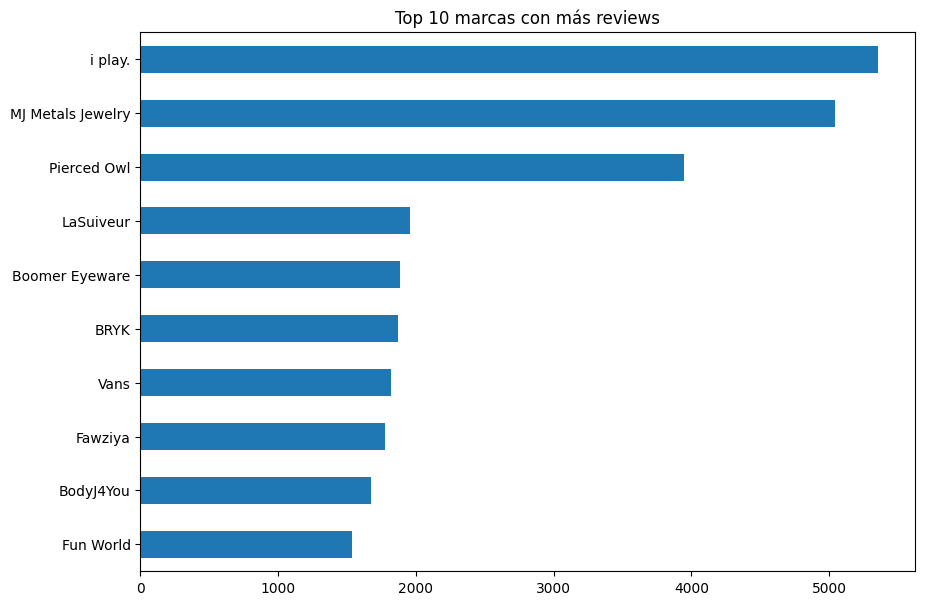

In [81]:
# 6. Top 10 marcas con más reviews
plt.figure(figsize=(10, 7))
data['brand'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 marcas con más reviews')
plt.gca().invert_yaxis()
plt.show()

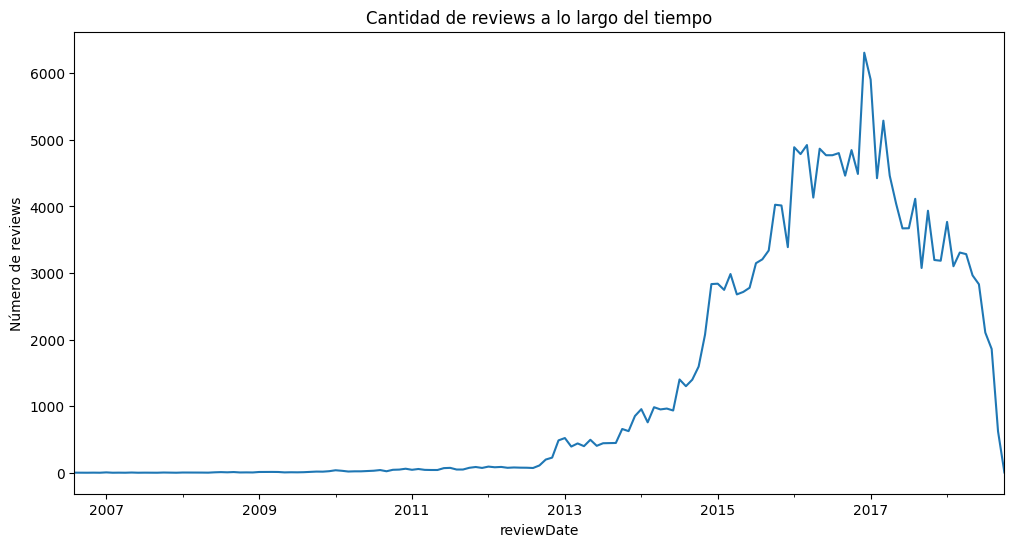

In [86]:
# 7. Serie temporal de reviews por fecha
plt.figure(figsize=(12, 6))
data.resample('M', on='reviewDate').size().plot()
plt.title('Cantidad de reviews a lo largo del tiempo')
plt.ylabel('Número de reviews')
plt.show()

<ipython-input-87-3cd6aa8e9672>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


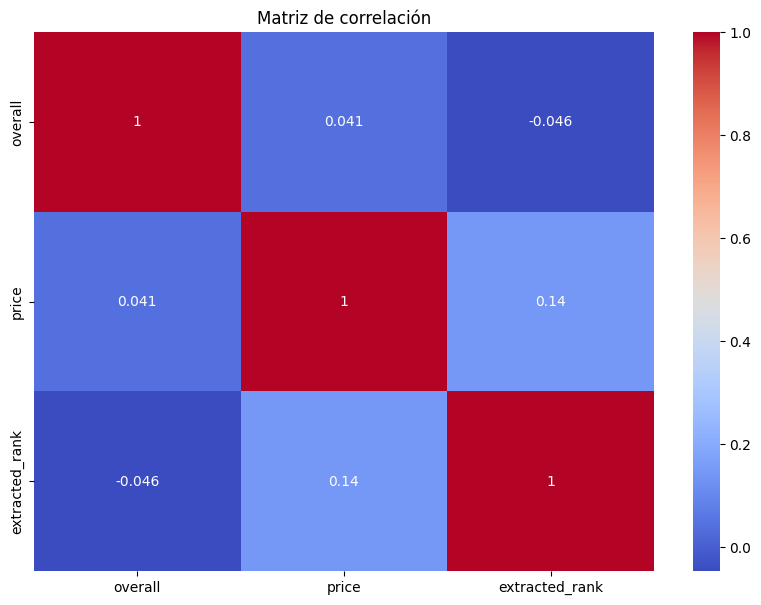

In [87]:
# 8. Matriz de correlación (útil para variables numéricas)
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()